# 1. 그레이디언트 소실과 폭주 문제

- 그레이디언트 소실(Vanishing Gradient) : 그레이디언트가 점점 작아져 훈련이 좋지 않은 솔루션으로 수렴되는 것
- 그레이디언트 폭주(Exploding Gradient) : 그레이디언트가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신되어 알고리즘이 발산하는 것
- 글로럿 초기화(Glorot Initialization) : 각 층의 연결 가중치를 랜덤으로 초기화하는 것, 세이비어 초기화
- 르쿤 초기화(LeCun Initialization) : 글로럿 초기화와 유사, 팬-인으로 교체
- He 초기화(He Initialization) : ReLU 활성화 함수와 변형을 위한 초기화 전략, 카이밍 초기화
- LeakyReLU : 하이퍼파라미터가 함수가 새는 정도 결정, RReLU, PReLU 사용
- ELU : ReLU와 비슷, 0이하 기울기 0으로 수렴
- SELU : 스케일이 조정된 ELU 활성화 함수의 변형
- GELU : ReLU 활성화 함수의 부드러운 변형
- Swish : GELU와 비슷
- Mish : Swish와 비슷
- 배치 정규화(Batch Normalization) : 각 층에서 활성화 함수를 통과하기 전이나 후에 모델에 연산을 하나 추가
- 그레이디언트 클리핑(Gradient Clipping) : 역전파될 때 특정 임계값을 넘어서지 못하게 그레이디언트를 잘라내는 것

# 2. 사전 훈련된 층 재사용하기

- 전이 학습(Transfer Learning) : 최상위 층을 제외하고 대부분의 층을 재사용할 수 있는 것
- 비지도 사전 훈련(Unsupervised Pretraining) : 레이블이 없는 훈련 샘플을 모은 것

# 3. 고속 옵티마이저

- 모멘텀 최적화(Momentum Optimization) : 종단속도에 도달할 때까지 빠르게 가속되는 것
- 네스테로프 가속 경사(Nesterov Accelerated Gradient) : 현재 위치가 아니라 모멘텀의 방향으로 조금 앞선 비용 함수의 그레이디언트를 계산하는 것
- AdaGrad : 가장 가파른 차원을 따라 그레이디언트 벡터의 스케일을 감소시키는 것
- RMSProp : 가장 최근 반복에서 비롯된 그레이디언트만 누적하는 것
- Adam(Adaptive Moment Estimation) : 적응적 모멘트 추정, 모멘텀 최적화 + RMSProp
- AdaMax : L2 노름을 L 노름으로 변경
- Nadam : Adam 옵티마이저에 네스테로프 기법 더한 것
- AdamW : 가중치 감쇠 규제 기법을 통합한 Adam 변형
- 학습률 스케줄링
    - 거듭제곱 기반 스케줄링
    - 지수 기반 스케줄링
    - 구간별 고정 스케줄링
    - 성능 기반 스케줄링
    - 1사이클 스케줄링

# 4. 규제를 사용해 과대적합 피하기

- L1 규제
- L2 규제
- 드롭아웃(Dropout) : 매 훈련 스텝에서 각 뉴런은 임시적으로 드롭아웃될 확률을 가짐
- 몬테 카를로 드롭아웃 : 훈련된 드롭아웃 모델을 재훈련하거나 수정하지 않고 성능을 크게 향상 가능
- 맥스-노름 규제 : 각각의 뉴런에 대해 입력의 연결 가중치가 되도록 제한

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


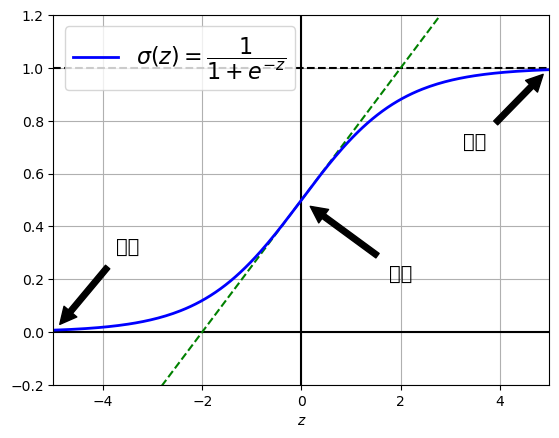

In [1]:
from matplotlib import pyplot as plt
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3 / 4, 7 / 4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2, label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('포화', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('포화', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('선형', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)
plt.show()

In [2]:
from keras_tuner.src.backend.io import tf

dense = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

In [3]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


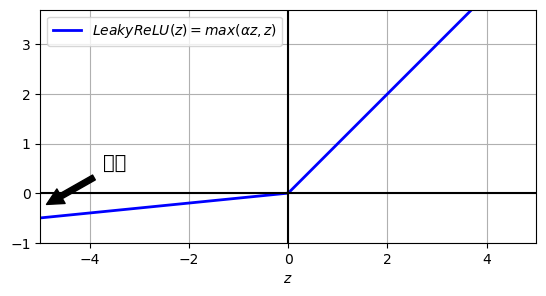

In [4]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)


z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('통과', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props, fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()
plt.show()

In [5]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
])

In [7]:
dense = tf.keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal")

Font 'default' does not have a glyph for '\uc774' [U+c774], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uba74' [U+ba74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc544' [U+c544], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2c8' [U+b2c8], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc774' [U+c774], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uba74' [U+ba74], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc544' [U+c544], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2c8' [U+b2c8], substituting with a dummy symbol.


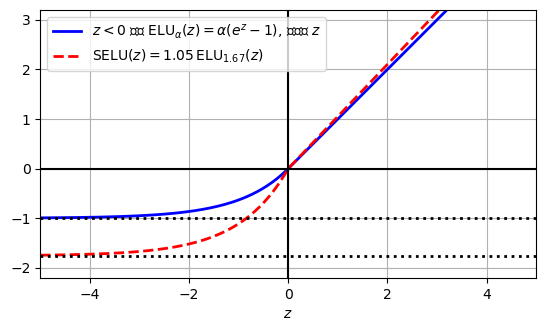

In [8]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
        (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
        * np.sqrt(2 * np.pi)
        * (
                2 * erfc(np.sqrt(2)) * np.e ** 2
                + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
                - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
                + np.pi
                + 2
        ) ** (-1 / 2)
)


def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)


def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)


z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"$z < 0$ 이면 ELU$_\alpha(z) = \alpha (e^z - 1)$, 아니면 $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()

In [9]:
dense = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal")

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

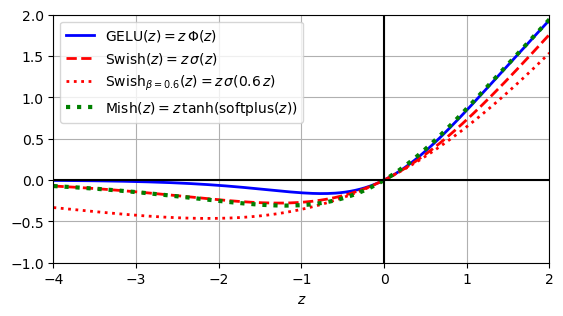

In [13]:
def swish(z, beta=1):
    return z * sigmoid(beta * z)


def approx_gelu(z):
    return swish(z, beta=1.702)


def softplus(z):
    return np.log(1 + np.exp(z))


def mish(z):
    return z * np.tanh(softplus(z))


z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2, label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2, label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2, label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3, label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")
plt.show()

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [17]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics="accuracy")
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics="accuracy")
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>

In [22]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [23]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [24]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")


def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))


(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A")

NameError: name 'class_names' is not defined

In [25]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

NameError: name 'X_train_B' is not defined

In [26]:
model_A = tf.keras.models.load_model("my_model_A")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

ValueError: File format not supported: filepath=my_model_A. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(my_model_A, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [28]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])


def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [31]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.6861 - loss: 0.9556 - val_accuracy: 0.8178 - val_loss: 0.5005
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.8310 - loss: 0.4821 - val_accuracy: 0.8326 - val_loss: 0.4538
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8478 - loss: 0.4317 - val_accuracy: 0.8414 - val_loss: 0.4268
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8579 - loss: 0.4015 - val_accuracy: 0.8482 - val_loss: 0.4114
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8654 - loss: 0.3795 - val_accuracy: 0.8538 - val_loss: 0.3978
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.8720 - loss: 0.3622 - val_accuracy: 0.8590 - val_loss: 0.3878
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.8762 - loss: 0.3482 - val_accuracy: 0.8600 - val_loss: 0.3809
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.8808 -

In [32]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [33]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - accuracy: 0.6684 - loss: 1.0018 - val_accuracy: 0.8224 - val_loss: 0.4916
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8328 - loss: 0.4758 - val_accuracy: 0.8364 - val_loss: 0.4484
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8502 - loss: 0.4266 - val_accuracy: 0.8442 - val_loss: 0.4239
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8603 - loss: 0.3971 - val_accuracy: 0.8482 - val_loss: 0.4046
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8661 - loss: 0.3751 - val_accuracy: 0.8538 - val_loss: 0.3924
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.8722 - loss: 0.3578 - val_accuracy: 0.8582 - val_loss: 0.3810
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.8764 - loss: 0.3438 - val_accuracy: 0.8604 - val_loss: 0.3714
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8810 -

In [34]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [35]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 781us/step - accuracy: 0.5340 - loss: 1.3922 - val_accuracy: 0.7680 - val_loss: 0.6966
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.7750 - loss: 0.6755 - val_accuracy: 0.8026 - val_loss: 0.5929
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8070 - loss: 0.5873 - val_accuracy: 0.8182 - val_loss: 0.5470
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.8216 - loss: 0.5431 - val_accuracy: 0.8236 - val_loss: 0.5196
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.8297 - loss: 0.5160 - val_accuracy: 0.8302 - val_loss: 0.5011
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.8344 - loss: 0.4974 - val_accuracy: 0.8328 - val_loss: 0.4876
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8384 - loss: 0.4835 - val_accuracy: 0.8344 - val_loss: 0.4773
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.8421 -

In [36]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [37]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.7631 - loss: 0.6559 - val_accuracy: 0.8392 - val_loss: 0.4354
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8545 - loss: 0.4041 - val_accuracy: 0.8466 - val_loss: 0.4025
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8674 - loss: 0.3718 - val_accuracy: 0.8584 - val_loss: 0.4095
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.8725 - loss: 0.3570 - val_accuracy: 0.8564 - val_loss: 0.4278
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8756 - loss: 0.3498 - val_accuracy: 0.8652 - val_loss: 0.4204
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8781 - loss: 0.3447 - val_accuracy: 0.8682 - val_loss: 0.4460
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8807 - loss: 0.3404 - val_accuracy: 0.8630 - val_loss: 0.4556
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.8837 -

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [39]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.7756 - loss: 0.6314 - val_accuracy: 0.8340 - val_loss: 0.4392
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.8569 - loss: 0.3890 - val_accuracy: 0.8396 - val_loss: 0.4057
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8717 - loss: 0.3482 - val_accuracy: 0.8398 - val_loss: 0.4124
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.8807 - loss: 0.3204 - val_accuracy: 0.8484 - val_loss: 0.4052
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8881 - loss: 0.2995 - val_accuracy: 0.8564 - val_loss: 0.3785
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.8963 - loss: 0.2801 - val_accuracy: 0.8678 - val_loss: 0.3685
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.8987 - loss: 0.2692 - val_accuracy: 0.8752 - val_loss: 0.3634
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9038 -

In [40]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [41]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.7600 - loss: 0.7101 - val_accuracy: 0.8422 - val_loss: 0.4340
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8544 - loss: 0.4130 - val_accuracy: 0.8518 - val_loss: 0.3967
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.8682 - loss: 0.3670 - val_accuracy: 0.8568 - val_loss: 0.3790
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.8785 - loss: 0.3377 - val_accuracy: 0.8586 - val_loss: 0.3702
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.8864 - loss: 0.3170 - val_accuracy: 0.8598 - val_loss: 0.3667
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.8921 - loss: 0.3003 - val_accuracy: 0.8624 - val_loss: 0.3542
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8967 - loss: 0.2865 - val_accuracy: 0.8648 - val_loss: 0.3558
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.9003 -

In [42]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [43]:
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7851 - loss: 0.6286 - val_accuracy: 0.8364 - val_loss: 0.4345
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8620 - loss: 0.3802 - val_accuracy: 0.8562 - val_loss: 0.3750
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3388 - val_accuracy: 0.8516 - val_loss: 0.3968
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8832 - loss: 0.3142 - val_accuracy: 0.8580 - val_loss: 0.3778
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8902 - loss: 0.2950 - val_accuracy: 0.8630 - val_loss: 0.3741
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8952 - loss: 0.2802 - val_accuracy: 0.8700 - val_loss: 0.3531
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9009 - loss: 0.2652 - val_accuracy: 0.8728 - val_loss: 0.3683
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9036 - loss: 0.2550 - 

In [44]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [45]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.7755 - loss: 0.6399 - val_accuracy: 0.8398 - val_loss: 0.4209
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.8573 - loss: 0.3908 - val_accuracy: 0.8474 - val_loss: 0.3928
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8717 - loss: 0.3470 - val_accuracy: 0.8544 - val_loss: 0.3797
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.8802 - loss: 0.3186 - val_accuracy: 0.8586 - val_loss: 0.3719
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8894 - loss: 0.2983 - val_accuracy: 0.8588 - val_loss: 0.3750
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8955 - loss: 0.2812 - val_accuracy: 0.8478 - val_loss: 0.4228
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8981 - loss: 0.2732 - val_accuracy: 0.8674 - val_loss: 0.3689
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9043 - los

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [47]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.6643 - loss: 1.0210 - val_accuracy: 0.8252 - val_loss: 0.4912
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.8332 - loss: 0.4756 - val_accuracy: 0.8370 - val_loss: 0.4454
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.8517 - loss: 0.4252 - val_accuracy: 0.8468 - val_loss: 0.4140
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.8598 - loss: 0.3974 - val_accuracy: 0.8516 - val_loss: 0.3928
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.8659 - loss: 0.3770 - val_accuracy: 0.8558 - val_loss: 0.3815
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.8712 - loss: 0.3614 - val_accuracy: 0.8552 - val_loss: 0.3748
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.8758 - loss: 0.3481 - val_accuracy: 0.8572 - val_loss: 0.3685
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.8796 -

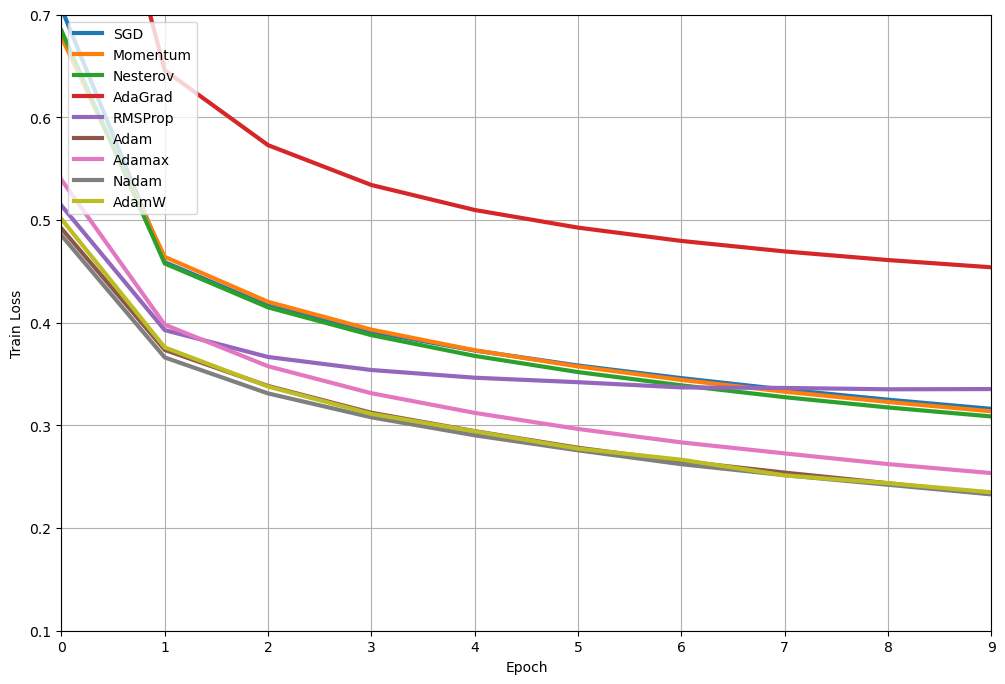

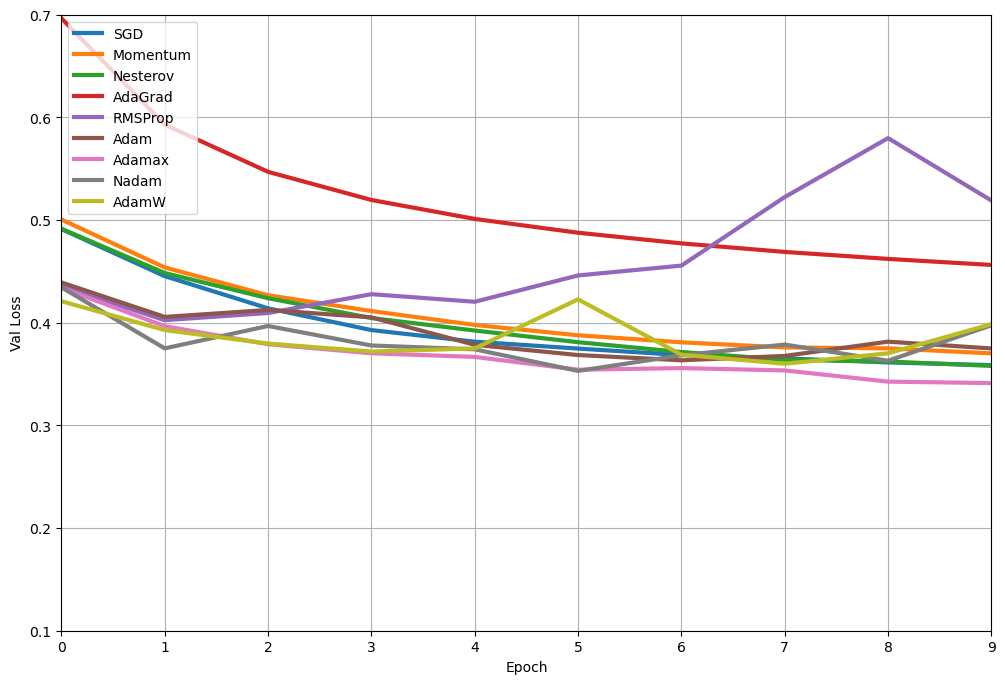

In [48]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov, history_adagrad, history_rmsprop,
                                  history_adam, history_adamax, history_nadam, history_adamw), opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel({"loss": "Train Loss", "val_loss": "Val Loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

In [49]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [50]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [51]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.6801 - loss: 0.9335 - val_accuracy: 0.8184 - val_loss: 0.4991
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8290 - loss: 0.4879 - val_accuracy: 0.8304 - val_loss: 0.4546
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8465 - loss: 0.4351 - val_accuracy: 0.8392 - val_loss: 0.4314
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.8573 - loss: 0.4069 - val_accuracy: 0.8474 - val_loss: 0.4160
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8636 - loss: 0.3878 - val_accuracy: 0.8516 - val_loss: 0.4036
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.8685 - loss: 0.3738 - val_accuracy: 0.8540 - val_loss: 0.3943
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.8728 - loss: 0.3630 - val_accuracy: 0.8578 - val_loss: 0.3867
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.8756 -

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46317 (\N{HANGUL SYLLABLE DEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/li

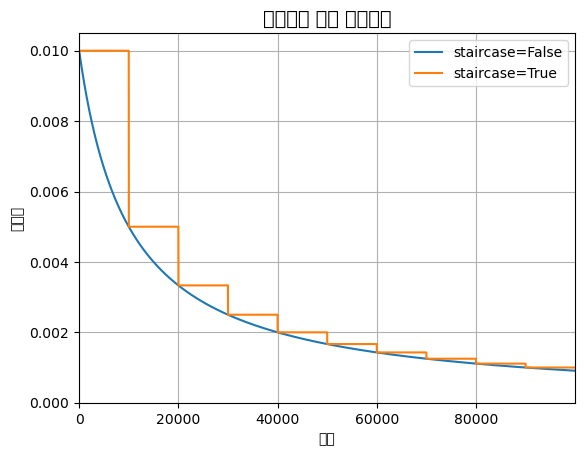

In [52]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs, "-", label="staircase=False")
plt.plot(steps, lrs2, "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("스텝")
plt.ylabel("학습률")
plt.title("거듭제곱 기반 스케줄링", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [53]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [54]:
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.6814 - loss: 0.9490 - val_accuracy: 0.8296 - val_loss: 0.4807
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.8290 - loss: 0.4859 - val_accuracy: 0.8404 - val_loss: 0.4410
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.8466 - loss: 0.4362 - val_accuracy: 0.8470 - val_loss: 0.4234
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.8562 - loss: 0.4092 - val_accuracy: 0.8498 - val_loss: 0.4099
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8619 - loss: 0.3913 - val_accuracy: 0.8506 - val_loss: 0.4004
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8663 - loss: 0.3785 - val_accuracy: 0.8546 - val_loss: 0.3920
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.8706 - loss: 0.3686 - val_accuracy: 0.8558 - val_loss: 0.3859
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.8731 -

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


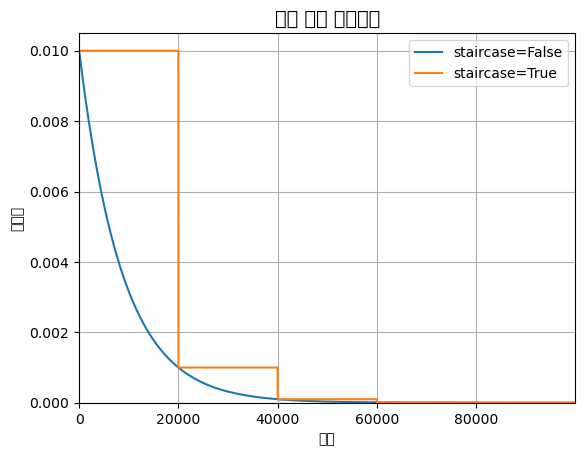

In [55]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs, "-", label="staircase=False")
plt.plot(steps, lrs2, "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("스텝")
plt.ylabel("학습률")
plt.title("지수 기반 스케줄링", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [56]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [57]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)

    return exponential_decay_fn


exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [58]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [59]:
n_epochs = 20
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.6660 - loss: 0.9949 - val_accuracy: 0.8268 - val_loss: 0.4894 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8271 - loss: 0.4935 - val_accuracy: 0.8408 - val_loss: 0.4455 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.8460 - loss: 0.4380 - val_accuracy: 0.8502 - val_loss: 0.4256 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8561 - loss: 0.4084 - val_accuracy: 0.8536 - val_loss: 0.4117 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.8626 - loss: 0.3881 - val_accuracy: 0.8594 - val_loss: 0.4001 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.8681 - loss: 0.3731 - val_accuracy: 0.8616 - val_loss: 0.3921 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accura

In [60]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

In [61]:
K = tf.keras.backend


class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
        K.set_value(self.model.optimizer.learning_rate, new_learning_rate)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

In [62]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [63]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid, y_valid), callbacks=[exp_decay])

Epoch 1/20


AttributeError: 'str' object has no attribute 'name'

In [64]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [65]:
history_piecewise_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.6768 - loss: 0.9667 - val_accuracy: 0.8250 - val_loss: 0.4926
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8265 - loss: 0.4915 - val_accuracy: 0.8348 - val_loss: 0.4513
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8448 - loss: 0.4363 - val_accuracy: 0.8470 - val_loss: 0.4260
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8559 - loss: 0.4041 - val_accuracy: 0.8530 - val_loss: 0.4095
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.8633 - loss: 0.3817 - val_accuracy: 0.8544 - val_loss: 0.3982
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.8693 - loss: 0.3643 - val_accuracy: 0.8576 - val_loss: 0.3895
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8749 - loss: 0.3498 - val_accuracy: 0.8598 - val_loss: 0.3800
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.8780 -

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


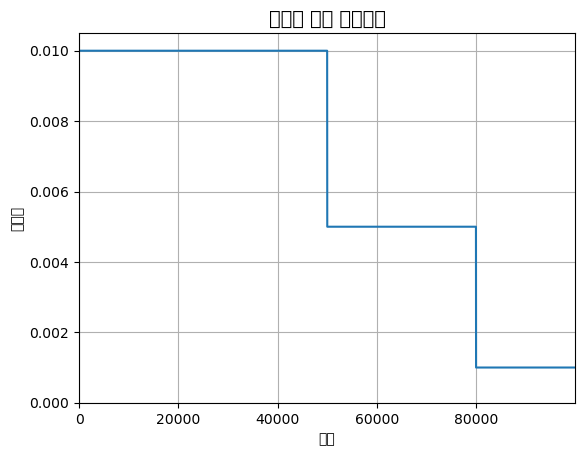

In [66]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("스텝")
plt.ylabel("학습률")
plt.title("구간별 고정 스케줄링", fontsize=14)
plt.grid(True)
plt.show()

In [67]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [68]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)

    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]

    return piecewise_constant_fn


piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [69]:
n_epochs = 25
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7577 - loss: 0.6807 - val_accuracy: 0.8292 - val_loss: 0.4608 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8404 - loss: 0.4515 - val_accuracy: 0.8376 - val_loss: 0.4545 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8462 - loss: 0.4409 - val_accuracy: 0.8136 - val_loss: 0.4982 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.4286 - val_accuracy: 0.8258 - val_loss: 0.4597 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8587 - loss: 0.4161 - val_accuracy: 0.8386 - val_loss: 0.4440 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3604 - val_accuracy: 0.8518 - val_loss: 0.3966 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - l

In [70]:
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"• {name} – {scheduler_class.__doc__.splitlines()[0]}")

• CosineDecay – A `LearningRateSchedule` that uses a cosine decay with optional warmup.
• CosineDecayRestarts – A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
• ExponentialDecay – A `LearningRateSchedule` that uses an exponential decay schedule.
• InverseTimeDecay – A `LearningRateSchedule` that uses an inverse time decay schedule.
• LearningRateSchedule – The learning rate schedule base class.
• PiecewiseConstantDecay – A `LearningRateSchedule` that uses a piecewise constant decay schedule.
• PolynomialDecay – A `LearningRateSchedule` that uses a polynomial decay schedule.


In [71]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [72]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.6911 - loss: 0.9336 - val_accuracy: 0.8230 - val_loss: 0.4808 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.8305 - loss: 0.4867 - val_accuracy: 0.8364 - val_loss: 0.4411 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.8481 - loss: 0.4341 - val_accuracy: 0.8408 - val_loss: 0.4275 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.8573 - loss: 0.4039 - val_accuracy: 0.8460 - val_loss: 0.4118 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.8633 - loss: 0.3827 - val_accuracy: 0.8516 - val_loss: 0.3987 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.8692 - loss: 0.3655 - val_accuracy: 0.8580 - val_loss: 0.3842 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accura

In [73]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("에포크")
plt.ylabel("학습률", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('검증 손실', color='r')
ax2.tick_params('y', colors='r')

plt.title("평탄 지역에서 LR 감소하기", fontsize=14)
plt.show()

KeyError: 'lr'

In [74]:
K = tf.keras.backend


class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [75]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4, max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [76]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("학습률")
    plt.ylabel("손실")
    plt.grid()

In [77]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [78]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

AttributeError: 'str' object has no attribute 'name'

In [79]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None, last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr, self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations, self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [80]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

Epoch 1/25


AttributeError: 'str' object has no attribute 'name'

In [81]:
layer = tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [82]:
tf.random.set_seed(42)

In [83]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

In [84]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7096 - loss: 4.0592 - val_accuracy: 0.8258 - val_loss: 1.8533
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.8145 - loss: 1.6201 - val_accuracy: 0.8270 - val_loss: 1.1166


In [85]:
tf.random.set_seed(42)

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [87]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.6728 - loss: 0.8941 - val_accuracy: 0.8310 - val_loss: 0.4384
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8062 - loss: 0.5359 - val_accuracy: 0.8478 - val_loss: 0.4131
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.8216 - loss: 0.4905 - val_accuracy: 0.8530 - val_loss: 0.3910
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.8342 - loss: 0.4586 - val_accuracy: 0.8580 - val_loss: 0.3779
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8370 - loss: 0.4433 - val_accuracy: 0.8590 - val_loss: 0.3751
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8419 - loss: 0.4320 - val_accuracy: 0.8686 - val_loss: 0.3589
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8454 - loss: 0.4208 - val_accuracy: 0.8744 - val_loss: 0.3489
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8512 -

In [88]:
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.8835 - loss: 0.3122


[0.3131903409957886, 0.8840727210044861]

In [89]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8667 - loss: 0.3694


[0.3731708228588104, 0.8640999794006348]

In [90]:
tf.random.set_seed(42)

In [91]:
y_probas = np.stack([model(X_test, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [92]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.017, 0.   , 0.06 , 0.   ,
        0.923]], dtype=float32)

In [93]:
y_proba[0].round(3)

array([0.   , 0.001, 0.   , 0.001, 0.001, 0.051, 0.001, 0.104, 0.001,
       0.839], dtype=float32)

In [94]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.002, 0.003, 0.002, 0.005, 0.004, 0.072, 0.005, 0.106, 0.003,
       0.141], dtype=float32)

In [95]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8643

In [96]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [97]:
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [98]:
mc_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1]) for sample in range(100)], axis=0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.08, 0.  , 0.86]],
      dtype=float32)

In [100]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [101]:
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 751us/step - accuracy: 0.7444 - loss: 0.7370 - val_accuracy: 0.8330 - val_loss: 0.4298
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8449 - loss: 0.4233 - val_accuracy: 0.8310 - val_loss: 0.4230
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.8588 - loss: 0.3836 - val_accuracy: 0.8382 - val_loss: 0.4057
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8679 - loss: 0.3605 - val_accuracy: 0.8340 - val_loss: 0.4128
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8710 - loss: 0.3493 - val_accuracy: 0.8390 - val_loss: 0.3948
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.8744 - loss: 0.3382 - val_accuracy: 0.8396 - val_loss: 0.4109
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.8762 - loss: 0.3318 - val_accuracy: 0.8470 - val_loss: 0.3820
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8794 - l